In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install pydicom

import numpy as np
import os
import glob
import pydicom
import pathlib
import scipy.ndimage
import matplotlib.pyplot as plt

In [ ]:
def load_scan(path):
    slices = [pydicom.read_file(filename) for filename in path]
    slices.sort(key = lambda x: int(x.InstanceNumber))
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)

    for s in slices:
        s.SliceThickness = slice_thickness

    return slices

In [ ]:
def get_pixels_hu(scans):
    image = np.stack([s.pixel_array for s in scans])
    image = image.astype(np.int16) # convert to int16 should be possible as values should always be low enough (<32k)

    # Set outside-of-scan pixels to 1
    # The intercept is usually -1024, so air is approximately 0
    image[image == -2000] = 0

    # Convert to HU
    intercept = scans[0].RescaleIntercept
    slope = scans[0].RescaleSlope

    if slope != 1:
        image = slope * image.astype(np.float64)
        image = image.astype(np.int16)

    image += np.int16(intercept)

    return np.array(image, dtype=np.int16)

In [ ]:
def resample(image, scan, new_spacing=[1,1,1]):

    spacing = np.array([patient[0].SliceThickness]+list(patient[0].PixelSpacing), dtype=np.float32)

    resize_factor = spacing / new_spacing
    new_real_shape = image.shape * resize_factor
    new_shape = np.round(new_real_shape)
    real_resize_factor = new_shape / image.shape
    new_spacing = spacing / real_resize_factor

    image = scipy.ndimage.interpolation.zoom(image, real_resize_factor)

    return image, new_spacing

In [ ]:
def sample_stack(stack, rows=6, cols=6, start_with=20, show_every=5):
    fig,ax = plt.subplots(rows,cols,figsize=[12,12])

    for i in range(rows*cols):
        ind = start_with + i*show_every
        ax[int(i/rows),int(i % rows)].set_title('slice %d' % ind)
        ax[int(i/rows),int(i % rows)].imshow(stack[ind],cmap='gray')
        ax[int(i/rows),int(i % rows)].axis('off')

    plt.show()

# LUAD (also called ADC)

### NSCLC-Radiogenomics

In [ ]:
i = 0
file_list = []
path = "..." # <--- INSERT HERE (...) THE PATH OF UNPROCESSED LUAD SCANS
folder_list = glob.glob(path+"/*",recursive=True)
for folder in folder_list:
  for dirName, subdirList, fileList in os.walk(folder):
    a = glob.glob(dirName+"/*.dcm",recursive=True)
    if a:
      file_list.append(a)

      dir = pathlib.PurePath(str(file_list))
      last_dir = dir.parent.name
      if dirName.endswith(last_dir):
        #print("Scan n. "+str(i+1))
        #print(dirName)
      i+=1

In [ ]:
i = 0
for file in range (len(file_list)):
  patient = load_scan(file_list[i])
  hu_scan = get_pixels_hu(patient)
  #print("Scan n. "+str(i+1))
  #print("Shape of HU converted adeno CT scans before resampling\t"+str(hu_scan.shape)+'')
  hu_res_scan, spacing = resample(hu_scan, patient, [1,1,1])
  #print("Shape of HU converted adeno CT scans after resampling\t"+str(hu_res_scan.shape)+'')
  i+=1

  np.save(".../scan-a-"+str(i),hu_res_scan) # <--- INSERT HERE (...) THE PATH WHERE TO SAVE HU CONVERTED AND RESAMPLED LUAD SCANS

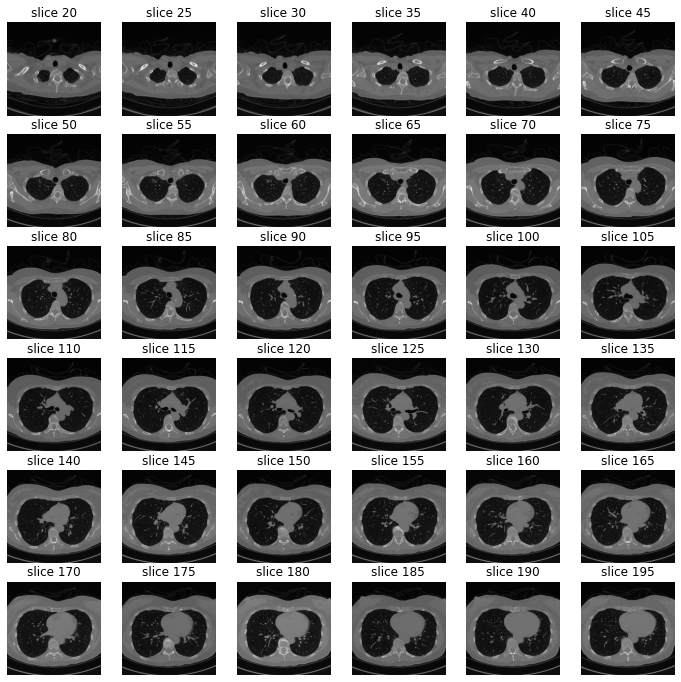

In [ ]:
hu_res_scan = np.load('.../scan-a-1.npy')
sample_stack(hu_res_scan)

### NSCLC-Radiomics

In [ ]:
i = 0
file_list = []
path = "..."
folder_list = glob.glob(path+"/*",recursive=True)
for folder in folder_list:
  for dirName, subdirList, fileList in os.walk(folder):
    a = glob.glob(dirName+"/*.dcm",recursive=True)
    if a:
      file_list.append(a)

      dir = pathlib.PurePath(str(file_list))
      last_dir = dir.parent.name
      if dirName.endswith(last_dir):
        #print("Scan n. "+str(i+1))
        #print(dirName)
      i+=1

In [ ]:
i = 0
for file in range (len(file_list)):
  patient = load_scan(file_list[i])
  hu_scan = get_pixels_hu(patient)
  #print("Scan n. "+str(i+1))
  #print("Shape of HU converted adeno CT scans before resampling\t"+str(hu_scan.shape)+'')
  hu_res_scan, spacing = resample(hu_scan, patient, [1,1,1])
  #print("Shape of HU converted adeno CT scans after resampling\t"+str(hu_res_scan.shape)+'')
  i+=1

  np.save(".../scan-a-"+str(i),hu_res_scan)

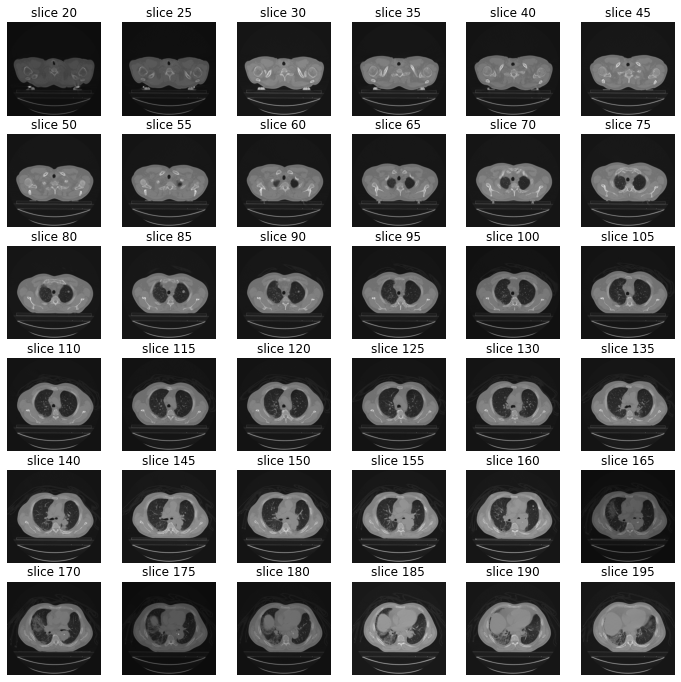

In [ ]:
hu_res_scan = np.load('.../scan-a-1.npy')
sample_stack(hu_res_scan)

### NSCLC-Radiomics-Genomics

In [ ]:
i = 0
file_list = []
path = "..."
folder_list = glob.glob(path+"/*",recursive=True)
for folder in folder_list:
  for dirName, subdirList, fileList in os.walk(folder):
    a = glob.glob(dirName+"/*.dcm",recursive=True)
    if a:
      file_list.append(a)

      dir = pathlib.PurePath(str(file_list))
      last_dir = dir.parent.name
      if dirName.endswith(last_dir):
        #print("Scan n. "+str(i+1))
        #print(dirName)
      i+=1

In [ ]:
i = 0
for file in range (len(file_list)):
  patient = load_scan(file_list[i])
  hu_scan = get_pixels_hu(patient)
  #print("Scan n. "+str(i+1))
  #print("Shape of HU converted adeno CT scans before resampling\t"+str(hu_scan.shape)+'')
  hu_res_scan, spacing = resample(hu_scan, patient, [1,1,1])
  #print("Shape of HU converted adeno CT scans after resampling\t"+str(hu_res_scan.shape)+'')
  i+=1

  np.save(".../scan-a-"+str(i),hu_res_scan)

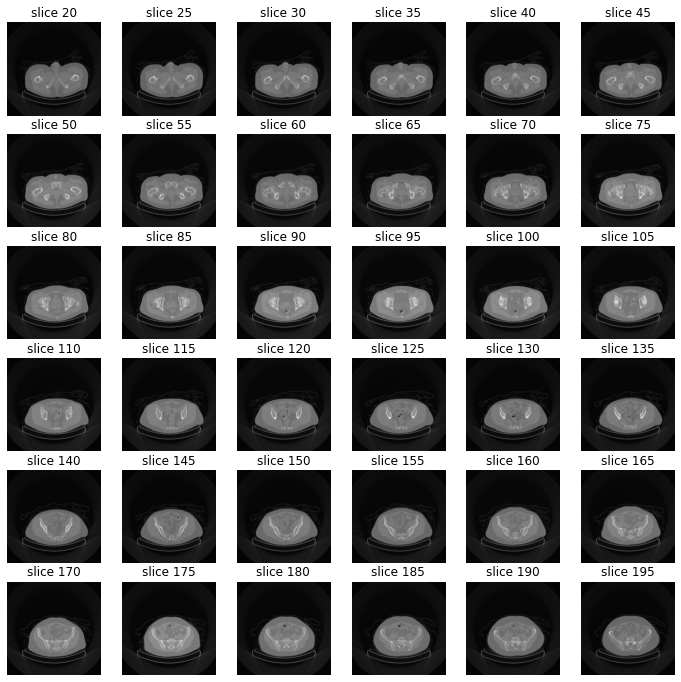

In [ ]:
hu_res_scan = np.load('.../scan-a-1.npy')
sample_stack(hu_res_scan)

### TCGA-LUAD

In [ ]:
i = 0
file_list = []
path = "..."
folder_list = glob.glob(path+"/*",recursive=True)
for folder in folder_list:
  for dirName, subdirList, fileList in os.walk(folder):
    a = glob.glob(dirName+"/*.dcm",recursive=True)
    if a:
      file_list.append(a)

      dir = pathlib.PurePath(str(file_list))
      last_dir = dir.parent.name
      if dirName.endswith(last_dir):
        #print("Scan n. "+str(i+1))
        #print(dirName)
      i+=1

In [ ]:
i = 0
for file in range (len(file_list)):
  patient = load_scan(file_list[i])
  hu_scan = get_pixels_hu(patient)
  #print("Scan n. "+str(i+1))
  #print("Shape of HU converted adeno CT scans before resampling\t"+str(hu_scan.shape)+'')
  hu_res_scan, spacing = resample(hu_scan, patient, [1,1,1])
  #print("Shape of HU converted adeno CT scans after resampling\t"+str(hu_res_scan.shape)+'')
  i+=1

  np.save(".../scan-a-"+str(i),hu_res_scan)

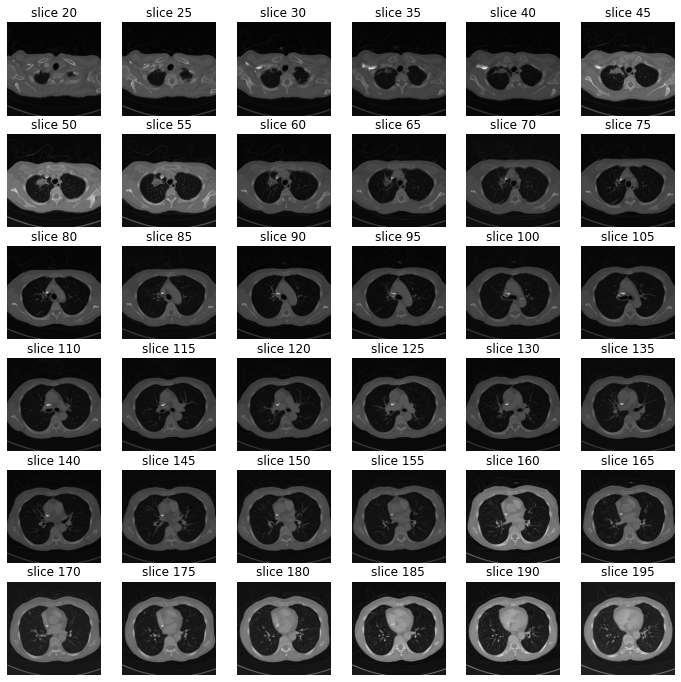

In [ ]:
hu_res_scan = np.load('.../scan-a-1.npy')
sample_stack(hu_res_scan)

# LUSC (also called SCC)

### NSCLC-Radiomics

In [ ]:
i = 0
file_list = []
path = "..." # <--- INSERT HERE (...) THE PATH OF UNPROCESSED LUSC SCANS
folder_list = glob.glob(path+"/*",recursive=True)
for folder in folder_list:
  for dirName, subdirList, fileList in os.walk(folder):
    a = glob.glob(dirName+"/*.dcm",recursive=True)
    if a:
      file_list.append(a)

      dir = pathlib.PurePath(str(file_list))
      last_dir = dir.parent.name
      if dirName.endswith(last_dir):
        #print("Scan n. "+str(i+1))
        #print(dirName)
      i+=1

In [ ]:
i = 0
for file in range (len(file_list)):
  patient = load_scan(file_list[i])
  hu_scan = get_pixels_hu(patient)
  #print("Scan n. "+str(i+1))
  #print("Shape of HU converted squamo CT scans before resampling\t"+str(hu_scan.shape)+'')
  hu_res_scan, spacing = resample(hu_scan, patient, [1,1,1])
  #print("Shape of HU converted squamo CT scans after resampling\t"+str(hu_res_scan.shape)+'')
  i+=1

  np.save("/scan-s-"+str(i),hu_res_scan) # <--- INSERT HERE (...) THE PATH WHERE TO SAVE HU CONVERTED AND RESAMPLED LUSC SCANS

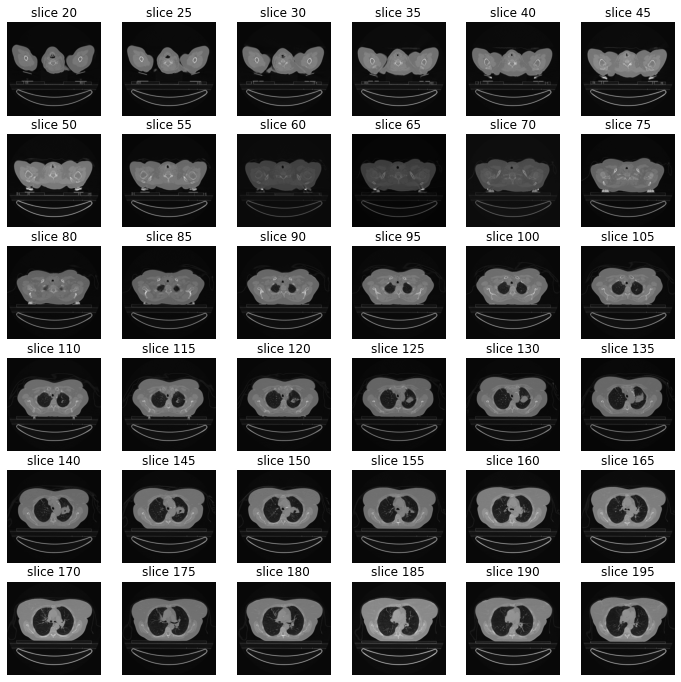

In [ ]:
hu_res_scan = np.load('.../scan-s-1.npy')
sample_stack(hu_res_scan)

### NSCLC-Radiomics-Genomics

In [ ]:
i = 0
file_list = []
path = "..."
folder_list = glob.glob(path+"/*",recursive=True)
for folder in folder_list:
  for dirName, subdirList, fileList in os.walk(folder):
    a = glob.glob(dirName+"/*.dcm",recursive=True)
    if a:
      file_list.append(a)

      dir = pathlib.PurePath(str(file_list))
      last_dir = dir.parent.name
      if dirName.endswith(last_dir):
        #print("Scan n. "+str(i+1))
        #print(dirName)
      i+=1

In [ ]:
i = 0
for file in range (len(file_list)):
  patient = load_scan(file_list[i])
  hu_scan = get_pixels_hu(patient)
  #print("Scan n. "+str(i+1))
  #print("Shape of HU converted squamo CT scans before resampling\t"+str(hu_scan.shape)+'')
  hu_res_scan, spacing = resample(hu_scan, patient, [1,1,1])
  #print("Shape of HU converted squamo CT scans after resampling\t"+str(hu_res_scan.shape)+'')
  i+=1

  np.save(".../scan-s-"+str(i),hu_res_scan)

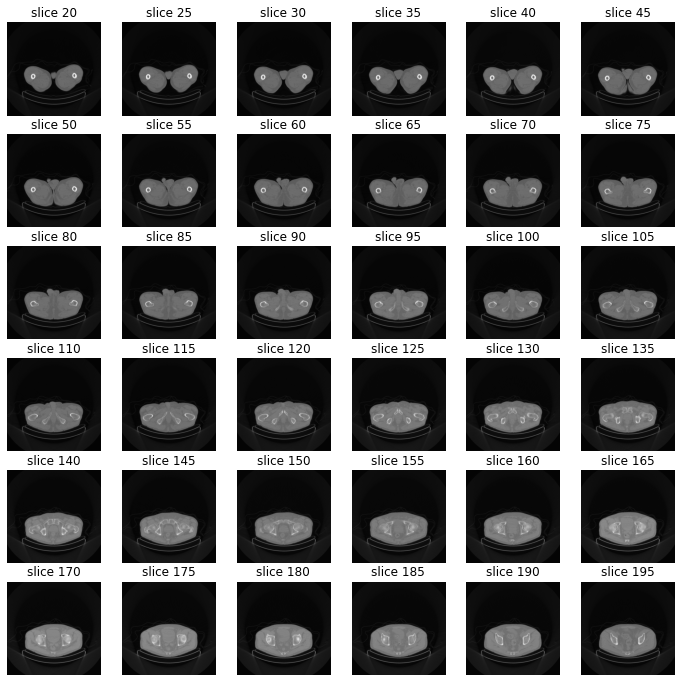

In [ ]:
hu_res_scan = np.load('.../scan-s-1.npy')
sample_stack(hu_res_scan)